In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.stats as stats

# Wyoming

In [2]:
# Files to open
wyoming_overdose = pd.read_csv("csv_series/overdose_Wyoming.csv")
wyoming_unemployment = pd.read_csv("csv_series/unemployment_states50.csv")
wyoming_earnings = pd.read_csv("csv_series/earnings_states50.csv")


In [3]:
wyoming_overdose.head()
wyoming_overdose = wyoming_overdose.sort_values(["Year"], ascending=False)
wyoming_overdose.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
7,Wyoming,2015,16.4,NaN,7.9,NaN,-0.15,NaN,-0.15,NaN
4,Wyoming,2014,19.4,NaN,9.3,NaN,0.13,NaN,0.08,NaN
1,Wyoming,2013,17.2,NaN,8.6,NaN,0.02,NaN,0.12,NaN
5,Wyoming,2012,16.8,NaN,7.7,NaN,0.11,NaN,0.03,NaN
16,Wyoming,2011,15.2,NaN,7.5,NaN,0.01,NaN,-0.12,NaN


In [4]:
wyoming_unemployment.head()

,state_id,year,unemployment_rate
0,50,2018,4.1
1,50,2017,4.1
2,50,2016,4.8
3,50,2015,4.9
4,50,2014,3.9


In [5]:
wyoming_earnings.head()

,state_id,year,earnings,pct_change
0,50,2018,207335,1.7
1,50,2017,203816,-0.6
2,50,2016,205040,-5.1
3,50,2015,215998,-1.0
4,50,2014,218127,2.2


In [6]:
combined_unemp_earn = pd.merge(wyoming_unemployment, wyoming_earnings, how="outer", on=['year'])
combined_unemp_earn.head()

,state_id_x,year,unemployment_rate,state_id_y,earnings,pct_change
0,50,2018,4.1,50.0,207335.0,1.7
1,50,2017,4.1,50.0,203816.0,-0.6
2,50,2016,4.8,50.0,205040.0,-5.1
3,50,2015,4.9,50.0,215998.0,-1.0
4,50,2014,3.9,50.0,218127.0,2.2


In [9]:
clean_unemp_earn = combined_unemp_earn[['state_id_x', 'year', 'unemployment_rate', 'earnings', 'pct_change']]
clean_unemp_earn = clean_unemp_earn.rename(columns={"state_id_x":"state", 'year': 'Year'})
clean_unemp_earn.head()

,state,Year,unemployment_rate,earnings,pct_change
0,50,2018,4.1,207335.0,1.7
1,50,2017,4.1,203816.0,-0.6
2,50,2016,4.8,205040.0,-5.1
3,50,2015,4.9,215998.0,-1.0
4,50,2014,3.9,218127.0,2.2


In [12]:
wyoming_combined = pd.merge(clean_unemp_earn, wyoming_overdose, how="outer", on=['Year'])
wyoming_combined_df = wyoming_combined[['Location','Year','unemployment_rate', 'earnings', 'pct_change', 
                                        'All Drug Overdose Death Rate (Age-Adjusted)', 
                                        'Opioid Overdose Death Rate (Age-Adjusted)',
                                        'Percent Change in All Drug Overdose Death Rate from Prior Year', 
                                        'Percent Change in Opioid Overdose Death Rate from Prior Year']]
wyoming_combined_df
wyoming_combined_df.dropna()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
3,Wyoming,2015,4.9,215998.0,-1.0,16.4,7.9,-0.15,-0.15
4,Wyoming,2014,3.9,218127.0,2.2,19.4,9.3,0.13,0.08
5,Wyoming,2013,4.5,213355.0,0.5,17.2,8.6,0.02,0.12
6,Wyoming,2012,5.1,212192.0,1.6,16.8,7.7,0.11,0.03
7,Wyoming,2011,5.6,208892.0,1.8,15.2,7.5,0.01,-0.12
8,Wyoming,2010,6.2,205226.0,-2.1,15.0,8.5,0.36,0.49
9,Wyoming,2009,7.1,209729.0,-6.2,11.0,5.7,-0.21,-0.25
10,Wyoming,2008,3.9,223575.0,3.1,14.0,7.6,0.14,0.65


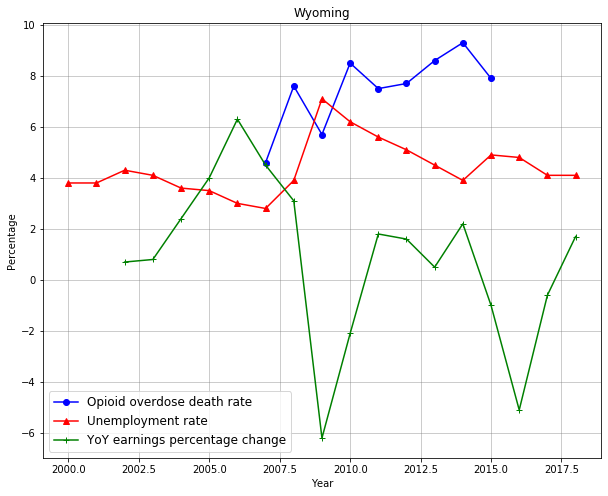

In [24]:
# Generate the plot
fig = plt.figure(figsize=(10,8))

# Create our x_axis list
x_axis = wyoming_combined_df['Year']

# Plot both of these lines so that they will appear on our final chart
overdose_handle, = plt.plot(x_axis, wyoming_combined_df['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = plt.plot(x_axis, wyoming_combined_df['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")
earnings_handle, = plt.plot(x_axis, wyoming_combined_df['pct_change'], marker='+', 
                                color='green', label="YoY earnings percentage change")

plt.legend(loc='lower left',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Wyoming")
plt.xlabel("Year")
plt.ylabel("Percentage")
 

plt.show()


In [25]:
avg_unemp = wyoming_combined_df['unemployment_rate'].mean()
avg_opioid_deathrate = wyoming_combined_df['Opioid Overdose Death Rate (Age-Adjusted)'].mean()
print(avg_unemp,avg_opioid_deathrate)

4.3736842105263145 7.48888888888889
